# Using Random Numbers

In [Random Number Generators](random_number_generators.md), we discussed the use of a pseudorandom number generator (pRNG) to yield *statistically* random numbers. The following discussion will focus on how to actually use the generated numbers in a practical sense.


## Other References

Note that [A primer on scientific programming with Python](https://link.springer.com/chapter/10.1007/978-3-662-49887-3_8) {cite}`langtangen2011primer` by Langtangen covers the use of random numbers in Python in *Chapter 8: Random numbers and Simple Games*. Some of our examples are borrowed directly from this chapter.

## Random in Python

In the previous discussion about generating *statistically* random sequences of numbers, we displayed simple examples of how pRNGs can be made. However, in practice, when there is a need to access random numbers in a script, it is better practice to rely on well implemented packages for the task. For example, in Python, there is the standard library `random`, and NumPy has its own `numpy.random` package for vectorized generation of random numbers. Both of these rely on the Mersenne Twister algorithm. As mentioned, this is an excellent pRNGs, and very robust for most scientific applications.


## Seeding

Like for any pRNG, it is possible to seed Python pRNG with the function `seed`. If a seed is not given as input, a random one shall be fed to the pRNG. It is important to mention that while testing code or looking for bugs, fixing the seed usually is a good idea, as it makes outputs consistent over multiple runs.

In [1]:
import random

random.seed(1234)
print(random.random())

0.9664535356921388


In [2]:
import numpy as np

np.random.seed(4545)
print(np.random.random())

0.10816512939267264


Both of these packages have a function called `random()`, which returns a pseudorandom floating point in the range $[0, 1)$. We also have access to plenty of other functions, which draw numbers from other distributions. These are mostly implemented by using `random()` behind the scenes.

Note that the `random` and `np.random` packages are very similar, with some slight differences. Therefore, not every example will make use of both. The major difference is that the NumPy package is *vectorized*, meaning a whole set of random numbers can be drawn at once. Because of this, the `np.random` package is the most useful and efficient for scientific applications and will be the one to focus on for this section.

Note also that for cryptographic and security purposes, the Mersenne Twister is completely unsuited. In these cases, `random` libraries should not be used. In contrast,  for such purposes, the [secrets](https://docs.python.org/3/library/secrets.html) library, released with Python 3.6, is best suited.


### `random()`

The simplest function, but perhaps also the most important, is `random()`, which returns a number in the range $[0, 1)$.

In [3]:
print(np.random.random())
print(np.random.random())
print(np.random.random())

0.614351942079199
0.4605892547831276
0.09490861368747994


With `np.random`, it is possible to draw multiple numbers at once with the keyword argument `size`. The results are then returned in a NumPy array.

In [4]:
print(np.random.random(size=30))

[0.22757495 0.93708434 0.87707599 0.62073907 0.94567712 0.98839807
 0.12890789 0.19876454 0.17536972 0.10987037 0.45100604 0.46309978
 0.08646816 0.00778096 0.68880803 0.08254698 0.77910104 0.05202863
 0.06692324 0.59134301 0.37129806 0.85377894 0.96742315 0.09143025
 0.06656051 0.13993966 0.95915816 0.99945193 0.28371376 0.23228119]


The following code plots some of these random numbers to give intuition

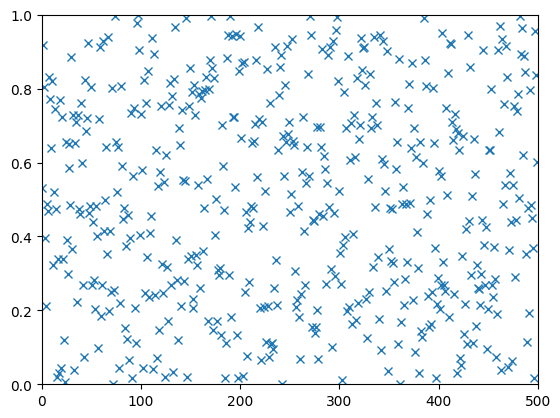

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

N = 500  # no of samples
samples = np.random.random(size=N)

plt.plot(samples, "x")
plt.axis((0, N, 0, 1))
plt.show()

As default, `np.random.random` returns, a uniform distribution. However, if a different uniform distribution, $[a, b]$, is desired, it is possible to obtain it by using the function `np.random.uniform(a, b)`

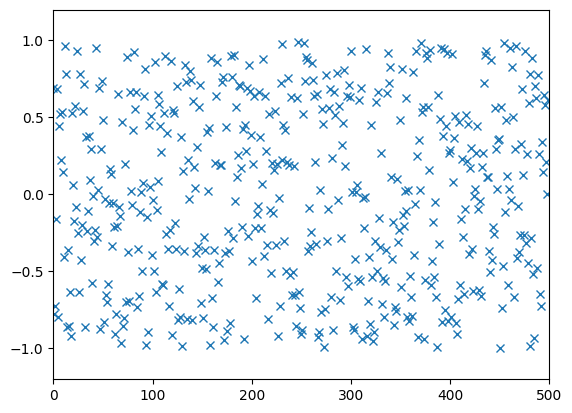

In [6]:
N = 500
samples = np.random.uniform(-1, 1, size=N)

plt.plot(samples, "x")
plt.axis((0, N, -1.2, 1.2))
plt.show()

If these numbers are actually uniformly distributed, we would expect the sample mean and sample standard deviation to approach the expected mean and standard deviation of a uniform distribution. This can be verified.

The expected mean of a uniform distribution is simply the mean of the interval

$$E(X) = \frac{a + b}{2}$$

And the variance is given by

$$\mbox{V}(x) = \frac{(b-a)^2}{12}.$$

And the standard deviation is the square of this $\sigma = \sqrt{{\rm V}(X)}$.

For the shown uniform distribution, we have $a = -1$, $b=1$. So the random samples are expected to have

$$\mbox{mean} = 0, \qquad \mbox{variance} = \frac{1}{3}, \qquad \mbox{standard deviation} = 0.57735.$$

This can also be verified

In [7]:
print(f"{'N':>10} {'mean':>10} {'var':>10} {'std':>10}")
print("=" * 50)

for N in 10, 100, 1000, 10000, 10**5, 10**6:
    x = np.random.uniform(-1, 1, size=N)
    mean = np.mean(x)
    variance = np.var(x)
    std = np.std(x)
    print(f"{N:10d} {mean:10.5f} {variance:10.5f} {std:10.5f}")

print("=" * 50)

         N       mean        var        std
        10   -0.03521    0.28530    0.53413
       100    0.01240    0.34114    0.58407
      1000    0.01992    0.34044    0.58347
     10000   -0.00264    0.33539    0.57912
    100000   -0.00154    0.33278    0.57687
   1000000   -0.00077    0.33322    0.57725


As the number of drawn uniform samples increases, we see the sample mean, variance, and standard deviation converge toward the expected values for a uniform distribution.

### Flipping coins with `randint()`

If one desires random integers instead, the function `randint()` should be used. If only one integer is passed as an argument to the function, the return is a uniformly distributed random integer in the range $[0, N)$. However, it is also possible to provide two arguments,  in which case those represent both extremes of the desired range, and a number on the range $[a, b)$ is then output.

As an example of a coin flip, we provide the code below

In [8]:
for i in range(3):
    result = np.random.randint(2)

    if result == 1:
        print("heads")
    elif result == 0:
        print("tails")

heads
heads
heads


In case of flipping one thousand coins, a loop can be implemented:

In [9]:
heads = 0
tails = 0
for i in range(1000):
    flip = np.random.randint(2)
    if flip == 1:
        heads += 1
    elif flip == 0:
        tails += 1

print("Heads:", heads)
print("Tails:", tails)

Heads: 490
Tails: 510


However, using a for-loop combined with an if-test is very slow. It would be considerably faster to draw all the numbers at once, and a better implementation would be

In [10]:
N = 1000

flips = np.random.randint(2, size=N)
heads = np.sum(flips)
tails = N - heads

print("Heads:", heads)
print("Tails:", tails)

Heads: 506
Tails: 494


The code below illustrates the difference in time executions for the mentioned solutions

In [11]:
def serial_flips(N):
    heads = 0
    tails = 0
    for i in range(N):
        flip = np.random.randint(2)
        if flip == 1:
            heads += 1
        elif flip == 0:
            tails += 1
    return heads, tails


def vectorized_flips(N):
    flips = np.random.randint(2, size=N)
    heads = np.sum(flips)
    tails = N - heads
    return heads, tails

It is possible to use `timeit` to measure how fast a certain code is in Python. When in a Jupyter Notebook, we can invoke `timeit` on a given function with the *cell magic* `%timeit`

In [12]:
%timeit serial_flips(1000)

3.36 ms ± 40.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%timeit vectorized_flips(1000)

24.8 µs ± 456 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [14]:
%timeit serial_flips(10**5)

348 ms ± 6.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit vectorized_flips(10**5)

476 µs ± 33.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


From these simple trials, it seems the vectorized version is about 100-300 times faster than the serial version. This is because the process is vectorized in low-level C code. Notice also the use of `np.sum` to sum the resulting array, which is considerably faster than the built-in `sum` function.


### Rolling dice with `randint()`

Since it is possible to adjust the boundaries of `randint()`, we can furthermore use this function to get other discrete, uniform distributions. Rolling a die, for example, returns numbers from 1 through 6, so a similar output can be achieved with `np.random.randint(1,7)`

In [16]:
print(np.random.randint(1, 7))
print(np.random.randint(1, 7))
print(np.random.randint(1, 7))

6
2
2


To extend the example above, it is possible to roll two dice and sum the results

In [17]:
for _ in range(5):
    print(np.sum(np.random.randint(1, 7, size=2)))

3
8
3
10
2


The result when summing two dice is a number from 2 through 12. However, these numbers will *not* be uniformly distributed, so simply using `randint(2, 13)` could *not* give the same distribution!

As a more drastic example, it is also possible to roll 1000 pairs of dice in a vectorized manner. The difference would be in the `size` keyword, which can be a *tuple* to specify more complex shapes than the number of throws. This is illustrated below

In [18]:
samples = np.random.randint(1, 7, size=(1000, 2))
print(samples)

[[2 6]
 [4 1]
 [4 1]
 ...
 [3 4]
 [1 2]
 [4 6]]


The code above results in a two-dimensional array of shape $1000\times 2$, which can be summed along one of its axis with `np.sum`

In [19]:
sums = np.sum(samples, axis=1)

print(sums.shape)
print(sums[:20])

(1000,)
[ 8  5  5  8  5  2  6  5  8  3  5  7  4  8 11  5  6  3  4  8]


The 1000 summed pair of die-rolls can plotted as a histogram

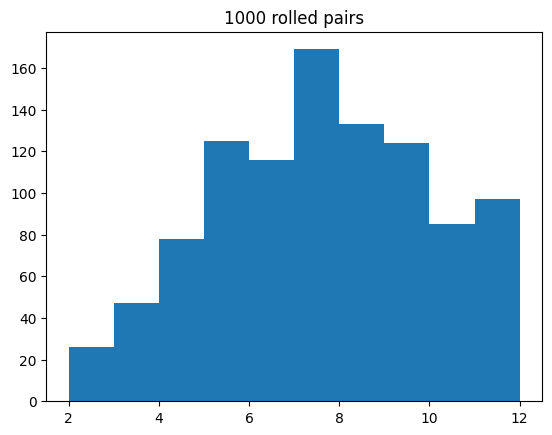

In [20]:
plt.hist(sums)
plt.title("1000 rolled pairs")
plt.show()

This above distribution could be perceived as having an unusual shape, given it looks very right-skewed, with considerably more results of 12 than 2. The reader is invited to think about the reasons behind this result. This could, of course, be posed as a lack of luck. Nevertheless, the skew looks *significant*, with almost twice the rolls of 12!

Below, we simplify and display only the number each result comes up. This is to show that the problem does not lie in the sampling or calculation itself but in the plotting.

In [21]:
for n in range(2, 13):
    print(f"{n:2}: {np.sum(sums == n)}")

 2: 26
 3: 47
 4: 78
 5: 125
 6: 116
 7: 169
 8: 133
 9: 124
10: 85
11: 71
12: 26


The written out results look somewhat more reasonable than the plot. It is clear, for example, that the number of twelves is less than the number of twos. The answer lies merely in how the histogram binning works. To fix it, we can explicitly set the bin edges between each number, starting at 1.5 to 2.5, then 2.5 to 3.5, and so on

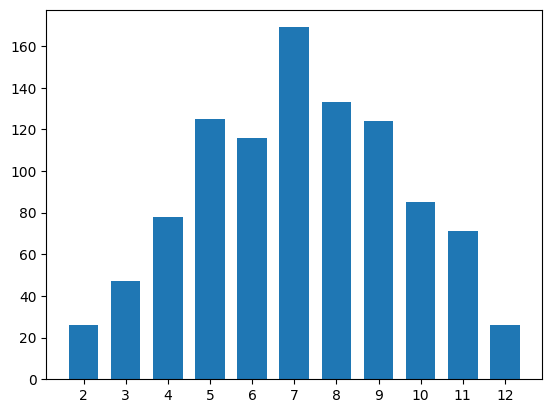

In [22]:
plt.hist(sums, bins=np.arange(1.5, 13), rwidth=0.7)
plt.xticks(range(2, 13))
plt.show()

Although this histogram looks reasonable, there are still counter-intuitive behaviors. The number of occurring sixes, for example, is greater than the number of sevens. Notice, however, that the number of experiments is not considerable (1000 samples) and that the mentioned offset is slight. It is therefore recommended, in this case, to repeat the experiment with a larger number of samples

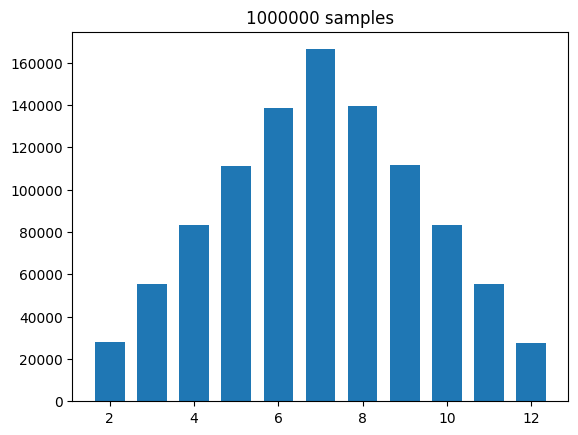

In [23]:
N = 10**6
samples = np.random.randint(1, 7, size=(N, 2))
samples = np.sum(samples, axis=1)

plt.hist(samples, bins=np.arange(1.5, 13), rwidth=0.7)
plt.title(f"{N} samples")
plt.show()

### Normally-distributed numbers

To generate normally distributed values, `np.random.normal(mean, std)` (or `random.normalvariate(mean, std)`) can be used as below to produce a histogram

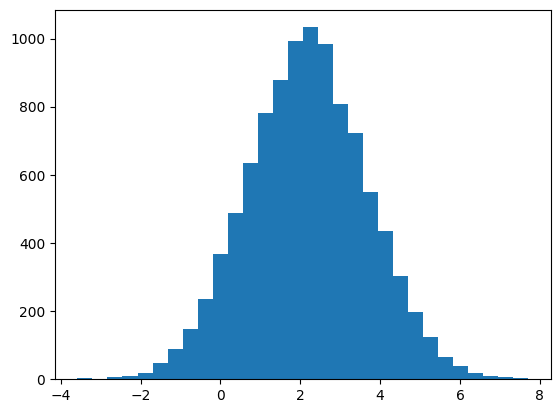

In [24]:
x = np.random.normal(2.2, 1.5, size=10000)

plt.hist(x, bins=30)
plt.show()

The above histogram does look fairly normally distributed. If we want to plot the corresponding probability density function, `scipy.stats.norm.pdf` can be used, together with the `density` keyword to `plt.hist`. This last requirement imposes a normalization of the y-axis, so it plots a probability density distribution and not the number of occurrences.

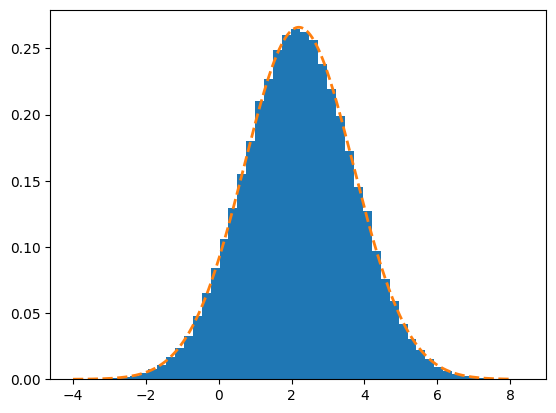

In [25]:
N = 10**5
mean = 2.2
sigma = 1.5

#### Drawing random samples
x = np.random.normal(mean, sigma, size=N)
plt.hist(x, bins=50, density=True)

#### Drawing the mathematical bell curve
import scipy.stats

x = np.linspace(-4, 8, 1001)
plt.plot(x, scipy.stats.norm.pdf(x, mean, sigma), "--", linewidth=2.0)

plt.show()

### Drawing Random Elements

If given a set of elements, for instance, a list, a sample of random elements can be drawn using `np.random.choice`. This can be used to easily return a lottery winner

In [26]:
candidates = [
    "Alfred",
    "Beatrice",
    "Charlie",
    "Danielle",
    "Elinor",
    "Fredrick",
    "Gabriel",
]
winner = np.random.choice(candidates)
print(winner)


Gabriel


We can, of course, also draw a sample of multiple winners:

In [27]:
winners = np.random.choice(candidates, 2)
print(winners)

['Charlie' 'Beatrice']


However, some caution is required here, as drawing multiple samples automatically uses replacement. Consequently, there is a risk of drawing the same person twice, which could be a desired possibility or not. The addition of the optional keyword `replace=False` disables the automatic replacement.


### Example: Drawing Balls from a Bag

A canonical probability theory example is would be a bag that contains two red and two blue balls in it. We invite the reader to think about the probability of getting one ball of each color when sampling two randomly.

```{figure} ../../figures/four_balls.png
---
width: 300px
name: four_balls
alt: four_balls
---
```


Instead of analyzing this problem, let us simply carry out the experiment multiple times and see how often we get one of each. To draw two balls at random, we create a list with the bag's contents and use `choice(2, replace=False)` (since drawing two balls at the same time, the drawing is without replacement).

In [28]:
N = 10**5

hat = ["red", "red", "blue", "blue"]
success = 0

for trial in range(N):
    sample = np.random.choice(hat, 2, replace=False)

    if "red" in sample and "blue" in sample:
        success += 1

print(f"Number of experiments: {N}")
print(f"Number of successes:  {success}")
print(f"Ratio of success:     {success/N}")

Number of experiments: 100000
Number of successes:  66693
Ratio of success:     0.66693


The result is that one ball of each color is drawn roughly 2/3 of the time. Therefore, the probability of drawing one ball of each color is 2/3, or 66.7%. This is an example of a *stochastic simulation*. While the simulation does not explain *why* the probability is 2/3, it can be a useful tool in exploring and finding probabilities in settings where an analytical solution is cumbersome.


### Shuffling lists

In previous sections, the topic of sorting lists has already been extensively discussed, Now we briefly introduce the subject of *shuffling* lists. Shuffling a list means moving the elements around so that they are at random indices. For this, the function `np.random.shuffle` can be useful. Note that it shuffles a list *in-place*, and returns nothing:

In [29]:
numbers = np.arange(100)
print("Before Shuffle")
print(numbers)
print()

np.random.shuffle(numbers)
print("After shuffle")
print(numbers)

Before Shuffle
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]

After shuffle
[34 11 23 92  9 52 43 88 87 14  3 26 67 31 24 60 72 98 81 22 63  1 37 68
  8 51 56 89 97 93 96 90 62 64  0 18 86 85 77 13 95  5 79 66 69 75 28 70
 15 65 35 20 49 40 41 46 10 30 39 32 53 59 21 50  2 84  4 73 80 48 54 29
 19 78 45 17 12 99 71 82 57 44 94 38 76 61 33 27 16 25 91 36 83  7 74 42
 58 47 55  6]


If a shuffled copy of a list or array is required, while keeping the original object, it is possible to make a copy prior to the shuffling and then shuffle the copy instead

In [30]:
x = np.arange(10)
y = np.copy(x)
np.random.shuffle(y)

print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[7 0 3 5 1 6 9 8 4 2]


Note that it is not sufficient to write `y = x` to make a copy, this will only make `y` a reference to the array, and not an actual copy, and so changing `y` will also change the original

In [31]:
x = np.arange(10)
y = x  # Does not actually copy, just creates a new name binding. x and y will refer to the same object
np.random.shuffle(y)

print(x)
print(y)

[7 9 2 6 1 0 4 3 5 8]
[7 9 2 6 1 0 4 3 5 8]


## Testing Randomness

So far, we have discussed plenty of examples of how to draw random numbers and how they can be used for simple experiments. However, how can one be confident that the randomly generated numbers are, indeed, random?

As previously explained, what is desirable is that the resulting numbers are *statistically* random. This means they should behave like truly random numbers in a statistical sense.

The troublesome part of testing whether this is the case is that randomness is finicky. One could be "unlucky" and end up in a very improbable state, concluding that the generated numbers are not random. An example would be throwing a die ten times and getting the same result for all rolls. One would expect the dice to be fake or rigged. However, a truly random die, at some point, will surely get ten repeated results. How, then, to decide on the legitimacy of the scenario?

The way this is handled for RNGs, is that instead of creating *one* test for an RNG, we create a whole *battery* of tests that look at different properties and examples. All these tests could be run, perhaps multiple times, to test an RNG. One single failure, or possibly a couple, can be expected in this process. However, if the RNG outputs fundamentally non-random numbers, many tests will fail.

Creating such test batteries is a challenging process, and requires a good understanding of statistical methods. Therefore, these are often created by professionals to test arbitrary RNGs. A famous such test battery is the [*Diehard tests*](https://sites.google.com/site/astudyofentropy/background-information/the-tests/dieharder-test-descriptions). This set of tests was created in 1995 and distributed widely.

The first test of the Diehard looks at the spacing of reoccurrences and is therefore called the birthday spacings test, based on the Birthday problem, as explained in [Random Number Generators](random_number_generators.ipynb). The other tests are similar in nature. A famous one is the *parking lot test*:
> Parking lot test: Randomly place unit circles in a 100×100 square. A circle is successfully parked if it does not overlap an existing successfully parked one. After 12,000 tries, the number of successfully parked circles should follow a certain normal distribution.

While the Diehard tests are very well known, a more recent and ever stricter test battery is the TestU01 battery, which was released in 2007. Interestingly enough, the Mersenne Twister 19937 passes all of the Diehard tests and most of, but not all, TestU01's tests. In contrast, PCG64 is able to pass all Diehard and TestU01's tests without failures, as shown in the [PCG paper](https://www.pcg-random.org/paper.html#download-and-read-it) {cite}`pcg2014`. This article also briefly describes the statistical test suite TestU01 and its historical significance for the field.


## Use of Randomness

We have now gone through and shown different functions in `np.random`, which can be used to generate random numbers. For each function, some simple examples were provided while discussing how to use these random numbers to explore different phenomena.

### Mathematical Modeling

In mathematical modeling, the goal is to create some model replicating or describing some physical phenomenon seen in nature. Some of these are deterministic: given a set of initial and boundary conditions, deterministic outcomes are expected. An example would be throwing a ball through the air.

Other phenomena, such as the ones previously discussed, are inherently random: rolling dice and drawing balls from a hat, to name a few. While such examples might seem trivial, or non-important, they serve as a good illustration. Nature, at the lowest level, seems to behave randomly, and can at least be well described by random molecular and thermal motion. Therefore, modeling such systems requires randomness.

Even systems that are deterministic in nature can act *chaotic*, such as illustrated with the double pendulum. Another example would be weather forecasting: while such systems might be deterministic, we can never perfectly capture the initial conditions and boundary conditions of such a system. In addition, the limited precision of floating points means it is impossible to model the system over time perfectly, as numerical errors might change the system's trajectory.

One solution to this can be to model the system stochastically, from a myriad of different initial conditions, and then use statistical techniques to compute *averaged* behaviors of the system. This is one way to learn a lot about a system, even when impossible to model its trajectory perfectly.

### Numerical Techniques

In addition to being used to include actual randomness in simulations. Many numerical techniques are based on using random sampling or random steps in some way. These techniques are used because they can be more effective at solving certain problems, meaning they for example converge towards a solution faster than a deterministic algorithm. Such techniques are usually referred to as *Monte Carlo* techniques, named from the famous *Casino de Monte-Carlo* in Monaco.



For the rest of this chapter, we will look at some more examples of using random numbers.


### Estimating probabilities

In the example of drawing balls from a bag, the experiment was repeated multiple times, and we evaluated the number of times a specific outcome occurred. The ratio of outcomes provides an *estimate* of the probability of that outcome.

This technique is completely general. As long as we can reproduce the random behavior itself, it is possible to simulate a large number of experiments and estimate the probability. Due to the law of large numbers, the larger the number of conducted experiments, the more confident the probability estimate becomes. More formally, it is possible to use statistics to find a *confidence interval* for those estimates, but this topic will not be covered now.


#### Example Rolling 20 or more on 5 dice

When rolling 5 dice and summing their outcomes, what is the probability of the result being larger or equal to 20? This is a fairly simple question, but it is slightly more challenging to analyze it mathematically. A possible way to solve it would be to write all the different results, counting the ones which fulfill the specified condition. However, with only 5 dice the number of possible combinations would be

$$6^5 = 7776.$$

Clearly, writing out *all* the outcomes would be too much work. Of course, there are smart ways of following this procedure, but thinking up all these clever tricks also requires some work.

Let us instead simply *simulate* and estimate the probability:

In [32]:
N = 10**5
success = 0

for i in range(N):
    if np.sum(np.random.randint(1, 7, size=5)) >= 20:
        success += 1

print(f"Simulations: {N}")
print(f"Nr of >=20:  {success}")
print(f"Ratio:       {success/N}")

Simulations: 100000
Nr of >=20:  30646
Ratio:       0.30646


From $N=10^5$ trials, it seems that the probability is at least close to 30.4%. In order to do even more simulations, it might be helpful to vectorize the example, so that Python for-loop is avoided altogether.

In [33]:
N = 10**7
rolls = np.random.randint(1, 7, size=(N, 5))
rolls = np.sum(rolls, axis=1)
success = np.sum(rolls >= 20)

print(f"Simulations: {N}")
print(f"Estimated prob.: {success/N:.2%}")

Simulations: 10000000
Estimated prob.: 30.48%


It is now possible to say with high confidence that the probability of obtaining a sum of 20 or more is around 30.5%. For this statement to be even more precise, it is also possible to use some statistics to formulate a confidence interval for this estimate.


While this example is fairly simple, it illustrates how *easy* it is to get to the probability estimate. It takes only a few lines of code and runs in a few seconds. Finding the probability analytically is a much bigger challenge. Moreover, while that is possible in this case, many cases are too complex to find an analytic expression for a probability, in which case estimates from Monte Carlo simulations might be all we have.


### Example: The Monty Hall Problem

The [*Monty Hall Problem*](https://mathweb.ucsd.edu/~crypto/Monty/montybg.html) is a famous brain teaser that led to a huge public debate in the US in 1990. The  problem, as it was originally stated, is as follows:

```{figure} ../../figures/doors.png
---
width: 400px
name: doors
alt: doors
---
```


> Suppose you’re on a game show, and you’re given the choice of three doors. Behind one door is a car, behind the others, goats. You pick a door, say #1, and the host, who knows what’s behind the doors, opens another door, say #3, which has a goat. He says to you, "Do you want to pick door #2?" Is it to your advantage to switch your choice of doors?


```{figure} ../../figures/doors_open.png
---
width: 500px
name: doors_open
alt: doors_open
---
```


The reason this problem became so popular is that it was sent to the column *Ask Marilyn* in Parade Magazine. In *Ask Marilyn*, Marilyn vos Savant answered questions on logical puzzles and brain teasers. It was a popular column, for, among other things, Marilyn was in the Guinness book of world records for having the World's highest IQ.

Marilyn's response was that the right strategy was to switch to door number 2. In the coming week, there were thousands of mailed replies to Parade magazine claiming Marilyn was wrong. Moreover, this was not just from lay people, but many Ph.Ds. in mathematics and several mathematics professors, declaring that Marilyn was not only wrong but responsible for the poor level of math education in the US.

In the coming weeks, Marilyn would not budge on her answer, instead writing different explanations and rationales in her answer. However, likewise, the mathematicians would not agree with her, calling her stubborn and ignorant.

The whole debacle ended when Marilyn proposed a challenge to the primary schools in the US. Simply perform the experiment in your classroom with some paper cups and a die. This put the whole debate to an end. As more and more classrooms performed the experiment, the results were tallied up, and showed that Marilyn was, in fact, right about the ideal strategy.

After this empirical proof of her answer, the academics eventually took the time to analyze the problem properly. Of course, Marilyn's answer was correct. It was only logical, they declared.

The Monty Hall problem is not just an excellent example of how probability theory can be highly counter-intuitive, and a good warning of the dangers of academic hubris. It is also a great example of Monte Carlo Simulation! Marilyn's challenge to the primary schools of the US is actually just a clever way of augmenting the number of simulations to get a reasonable probability estimate.

It is possible to recreate the experiment in Python carrying out the same steps for each simulation
1. Place the prize between one of the three doors at random
2. Select one of the three doors as the initial guess
3. The host now opens one of the remaining doors that has a goat behind it
4. Depending on the strategy, maintain or switch the guess
5. Check the final prize

Below is the simulation of a single game

In [34]:
strategy = "switch"

prize = np.random.randint(3)
initial = np.random.randint(3)
host = np.random.choice([nr for nr in range(3) if nr != initial and nr != prize])
final = (
    initial
    if strategy == "stay"
    else [nr for nr in range(3) if nr != host and nr != initial][0]
)
win = final == prize

print("The prize is behind door:", prize)
print("We guess door: ", initial)
print("The host reveals a goat behind door", host)
print("We are playing:", strategy)
print("Final door selected:", final)
print("You win!" if win else "You lose!")

The prize is behind door: 0
We guess door:  2
The host reveals a goat behind door 1
We are playing: switch
Final door selected: 0
You win!


After verifying that one game works, we can simulate a large number of them

In [35]:
N = 10**5
strategy = "switch"
wins = 0

for i in range(N):
    prize = np.random.randint(3)
    initial = np.random.randint(3)
    host = np.random.choice([nr for nr in range(3) if nr != initial and nr != prize])
    final = (
        initial
        if strategy == "stay"
        else [nr for nr in range(3) if nr != host and nr != initial][0]
    )
    win = final == prize
    wins += win

print(f"{N} Games Played with strategy: {strategy}")
print(f"Won {wins} games ({wins/N:.1%})")

100000 Games Played with strategy: switch
Won 66708 games (66.7%)


For an excellent walkthrough explanation about the Monty Hall Problem, see the complementary [video](https://ocw.mit.edu/courses/6-041sc-probabilistic-systems-analysis-and-applied-probability-fall-2013/resources/the-monty-hall-problem-1/) taken from MIT's course 6.041SC - Probabilistic Systems Analysis and Applied Probability.

### Finding Pi by Throwing Darts

Imagine an experiment where darts are randomly thrown at the following dartboard

```{figure} ../../figures/dartboard.png
---
width: 300px
name: dartboard
alt: dartboard
---
```


What are the chances that a dart, thrown blindly, lands within the board itself (the circle) and not outside it (the corners)? It is reasonable to expect this probability to depend on the area of the target

$$P(\text{hit}) = \frac{\text{area of circle}}{\text{total area}} = \frac{\pi r^2}{2r\cdot 2r} = \frac{\pi}{4}.$$

This expression is fairly simple, and we can compute the probability based on the value of $\pi$. However, by isolating $\pi$

$$\pi = 4\cdot P(\text{hit}).$$

Meaning it is possible to compute the value of $\pi$ (assuming it is not known) by finding $P(\text{hit})$. The way of finding $P(\text{hit})$ without knowing $\pi$ is via Monte Carlo simulations.

The following code draws the board and throws 10 darts at it:

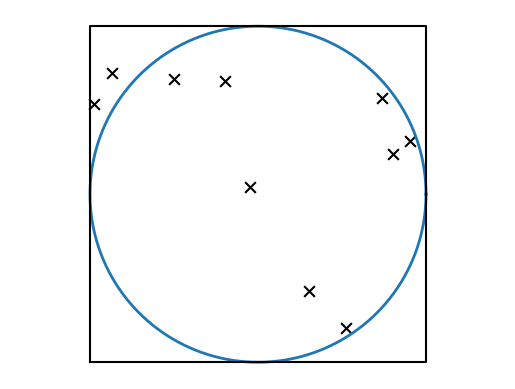

In [36]:
theta = np.linspace(0, 2 * np.pi, 1001)
plt.plot(np.cos(theta), np.sin(theta), linewidth=2.0)
plt.plot((-1, -1, 1, 1, -1), (-1, 1, 1, -1, -1), color="k")
plt.axis("equal")
plt.axis("off")


for i in range(10):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    plt.scatter(x, y, marker="x", color="black", s=60)

plt.show()

It is then possible to check whether a dart has hit the board or not by computing the distance to the origin from $\sqrt{x^2 + y^2}$. If this distance is $\leq 1$, then, by definition, this point is outside the circle.

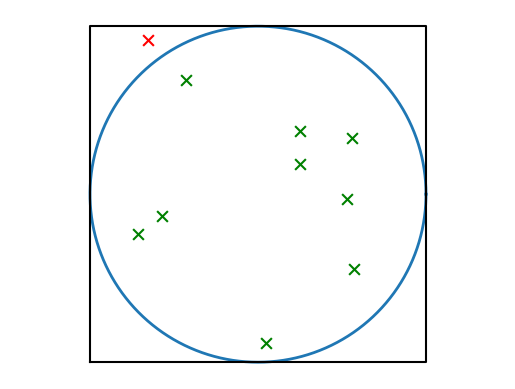

In [37]:
theta = np.linspace(0, 2 * np.pi, 1001)
plt.plot(np.cos(theta), np.sin(theta), linewidth=2.0)
plt.plot((-1, -1, 1, 1, -1), (-1, 1, 1, -1, -1), color="k")
plt.axis("equal")
plt.axis("off")


for i in range(10):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)

    if np.sqrt(x**2 + y**2) <= 1:
        plt.scatter(x, y, marker="x", color="green", s=60)
    else:
        plt.scatter(x, y, marker="x", color="red", s=60)

plt.show()

Now, to find the actual probability, plotting is not needed. Instead, it suffices to draw the numbers and check the inequality

In [38]:
N = 10**5
hits = 0

for i in range(N):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if np.sqrt(x**2 + y**2) <= 1:
        hits += 1

pi_estimate = 4 * hits / N
print(pi_estimate)

3.14964


Although this program works well, it is far from optimized. First, it is useful to vectorize it below

In [39]:
N = 10**5
x = np.random.uniform(-1, 1, size=N)
y = np.random.uniform(-1, 1, size=N)
hits = np.sum(np.sqrt(x**2 + y**2) <= 1)

pi_estimate = 4 * hits / N
print(pi_estimate)

3.1386


Notice, however, that using the distribution `uniform(-1, 1)` is not necessary, as it is sufficient to draw numbers from $[0, 1)$. This is because the geometry is symmetrical, so working only in the upper right corner works equally well. Using `random` is faster than `uniform`. The use of the square root is also unnecessary once the inequality is checked against 1, and $\sqrt{1} = 1$. Taking the square is an expensive operation, and so skipping it will give a large speed-boost

In [40]:
N = 10**7
x = np.random.random(size=N)
y = np.random.random(size=N)
hits = np.sum(x**2 + y**2 <= 1)

pi_estimate = 4 * hits / N
print(pi_estimate)

3.14105


Comparing the non-optimized scaler version to the fully optimized solutions on speed yields

In [41]:
def simple_darts(N):
    hits = 0
    for i in range(N):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if np.sqrt(x**2 + y**2) <= 1:
            hits += 1
    return 4 * hits / N


def optimized_darts(N):
    x = np.random.random(size=N)
    y = np.random.random(size=N)
    hits = np.sum(x**2 + y**2 <= 1)
    return 4 * hits / N

In [42]:
%timeit simple_darts(10**6)

6.52 s ± 162 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
%timeit optimized_darts(10**6)

28.2 ms ± 662 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Monte Carlo Integration

The example of throwing darts to find $\pi$ works because it is possible to estimate the probability of hitting the board as proportional to the *area* of the board. Actually, integrating a function is the process of finding the area under the curve, so the above-mentioned process can be used to integrate essentially *any* function in a process known as Monte Carlo Integration.


### Some Formalities

The above statement requires some formalizations. Using the Mean-Value Theorem, it is possible to express any integral in the following way

$$\int_a^b f(x)\ {\rm d}x = (b-a)\bar{f}.$$

Here, $\bar{f}$ denotes the mean value of $f$ on the interval $[a, b]$, which is defined as

$$\bar{f} = \frac{1}{b-a}\int_{a}^b f(x)\ {\rm d}x.$$

The above is just a rewriting of the integral, interpreting the area under the curve as a rectangle with height $\bar{f}$ and width $b-a$.

In numerical integration, an approximation to the integral is found by approximating the mean value of the function by evaluating it in a *finite* number of points:

$$\bar{f} \approx \frac{1}{n}\sum_{i=0}^{n-1} f(x_i).$$

Precisely *which* points to sample from the function and how many points to use is adjustable, and each of those choices results in using so-called different numerical *schemes*.

One option is to choose  $N$ uniformly spaced points in the range $[a, b)$, i.e., the points

$$x_i = a + i\cdot h, \qquad i=0, \ldots N-1,$$

which results in the left Riemann sum. In contrast, the right Riemann sum makes use of the right-aligned points instead

$$x_i = a + (i+1)\cdot h, \qquad i=0, \ldots N-1.$$

One final option is using the *middle* of each interval, which gives the famous *midpoint* method

$$x_i = a + (i+\frac{1}{2})\cdot h, \qquad i=0, \ldots N-1.$$

One crucial commonality of those methods is that the larger the number of used points $N$, the better the numerical approximation of the integral will be. Although it will not be shown here, the error of these schemes can be analyzed: the left and right Riemann sum both have an error on the order of $\mathcal{O}(1/N).$ As the number of points used grows, the error decreases. Because the step length $h$ is inversely proportional to $N$, it is common to formulate the error as $\mathcal{O}(h)$. If the step length is halved, the error should be halved as well.

The midpoint method, however, is better, with an error of $\mathcal{O}(1/N^2)$ or $\mathcal{O}(h^2)$. We, therefore, say the midpoint method is a *second-order* method. By reducing the step length by a factor of 10, the error should decrease by a factor of a 100. This gives good scaling and better convergence of the solution.

In addition to these, many other numerical integration schemes exist, such as the *trapezoidal* rule or Simpson's method. The idea is nevertheless the same: approximating the integral with some finite sum.

The idea behind Monte Carlo integration is essentially the same, but instead of spreading the points out uniformly over the interval $[a, b]$, the selection of the set of points is *random*. As long as the points are drawn from a uniform distribution, the sampling will tend to be uniform. Consequently, given enough points, the sample will form a good mean of the function and, thus, a good integral.


### Implementing Monte Carlo integration

The idea behind Monte Carlo integration is quite simple, and implementing a function that carries out the technique to integrate an arbitrary function on the interval $[a, b]$ is, therefore, not too challenging:

In [44]:
def monte_carlo_integrate(f, a, b, n):
    total = 0
    for i in range(n):
        x = random.uniform(a, b)
        total += f(x)
    return (b - a) * total / n

Let us try to evaluate the function by performing the integral

$$\int_0^{2} e^{4x} \cos (2x) {\rm\ d}x.$$

Using any integration software, one concludes the answer should be

$$\frac{1}{10}\bigg(e^{8}\big(sin(4) + 2\cos(4)\big) - 2\bigg).$$

In [45]:
def f(x):
    return np.exp(4 * x) * np.cos(2 * x)


approx = monte_carlo_integrate(f, 0, 2, 1000)
exact = (np.exp(8) * (np.sin(4) + 2 * np.cos(4)) - 2) / 10


print("Approx: ", approx)
print("Exact: ", exact)

Approx:  -630.398172265861
Exact:  -615.4964787585798


Because Monte Carlo integration is inherently random, a slightly different estimate is given for each execution of the function

In [46]:
print(monte_carlo_integrate(f, 0, 2, 1000))
print(monte_carlo_integrate(f, 0, 2, 1000))
print(monte_carlo_integrate(f, 0, 2, 1000))

-633.0297704225545
-656.8898169769027
-633.2168351593492


More points can be used to get a smaller error and a better confidence interval. It is also possible to create a vectorized version for the function

In [47]:
def monte_carlo_int_vectorized(f, a, b, n):
    x = np.random.uniform(a, b, n)
    total = np.sum(f(x))
    return float(b - a) * total / n

Note that this function will only work if the function `f` itself is vectorized. Luckily, all the NumPy functions, such as `exp` and `cos`, are vectorized, and so `f` will be vectorized as well.
Let us compute a set of estimates with different $N$ and print out the relative error:

In [48]:
exact = (np.exp(8) * (np.sin(4) + 2 * np.cos(4)) - 2) / 10

for n in range(3, 8):
    N = 10**n
    I = monte_carlo_int_vectorized(f, 0, 2, N)
    rel_error = (I - exact) / exact
    print(f"{N:6.0e} {rel_error:15.5e}")


 1e+03    -3.11578e-02
 1e+04     1.15748e-02
 1e+05     4.48411e-03
 1e+06    -5.78664e-05


 1e+07     5.21020e-04


We see that as the number of points increases, the error decreases. While this simple experiment is far from conclusive proof of anything, it is interesting to note that the error decreases by one order of magnitude whilst the number of samples increases by 2 orders of magnitude. In fact, it can be shown that the error in Monte Carlo integration goes as $\mathcal{O}(1/\sqrt{N})$, in agreement with our observations. Note that in this case, it is not possible to express the scaling in terms of the step length $h$, as there is no "step length".

### Why is Monte Carlo Integration useful?

Monte Carlo integration scales as $\mathcal{O}(N^{-1/2})$, while the midpoint method (which is approximately just as simple to implement) scales as $\mathcal{O}(N^{-2})$, which is considerably better. So why then use the Monte Carlo method over the Midpoint method?

For simple, one-dimensional integrals, such as the one shown here, using the midpoint method is more reasonable. However, when dealing with higher-dimensional integrals (from dimension three onwards), techniques that try to cover the whole space quickly become insurmountable, as decreasing or halving the step size demands several more points. For such problems, Monte Carlo integration scales better and outperforms techniques such as the midpoint rule.

There are also ways to modify Monte Carlo integration to make it more useful. By plotting the function we integrated above, for example, it is clear the values start close to 0 and quickly grow very fast in the negative direction:

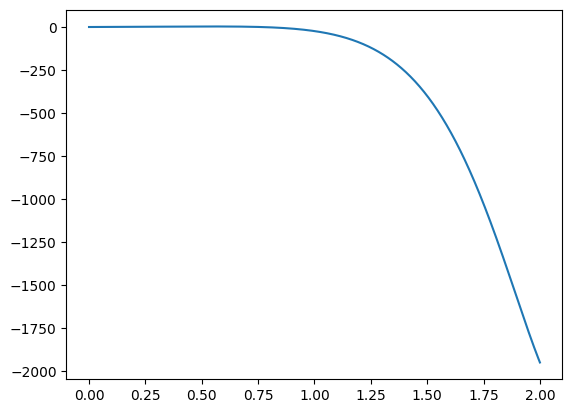

In [49]:
x = np.linspace(0, 2, 1001)
plt.plot(x, f(x))
plt.show()

When sampling this integral uniformly (either with the midpoint method or Monte Carlo), much of the numerical resources are spent in an interval that is not significant. The correct approach is instead to sample with a better resolution closer to the high end of the interval.

For non-Monte Carlo methods, this can be achieved by selecting mesh points that are not uniformly spread out. For the Monte Carlo method however, we should instead not draw points from a uniform distribution, but from a distribution better suited for our problem. This is known as *importance sampling*, because we are trying to put more effort into the sampling that is important for the end result. For some problems, adding importance sampling will make Monte Carlo simulation a lot more efficient.



## References

```{bibliography}
:filter: docname in docnames
```